<a href="https://colab.research.google.com/github/Randa1989/Demo/blob/main/Bank_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import io
data=files.upload()

Saving bank.csv to bank.csv


In [6]:

df=pd.read_csv(io.StringIO(data['bank.csv'].decode('utf-8')))

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
df.corr

<bound method DataFrame.corr of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campa

In [11]:
df.shape

(11162, 17)

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df['deposit'].value_counts()/df.shape[0]

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

Text(0.5, 1.0, 'اEDUCATION & DEPOSITS')

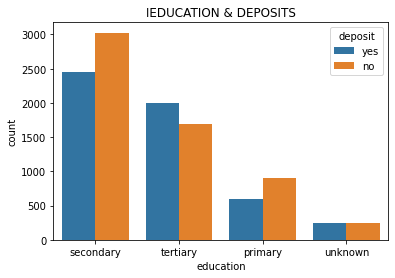

In [19]:
sns.countplot(x="education", hue="deposit", data=df)
plt.title('اEDUCATION & DEPOSITS')

Text(0.5, 1.0, 'Jobs & Depoists')

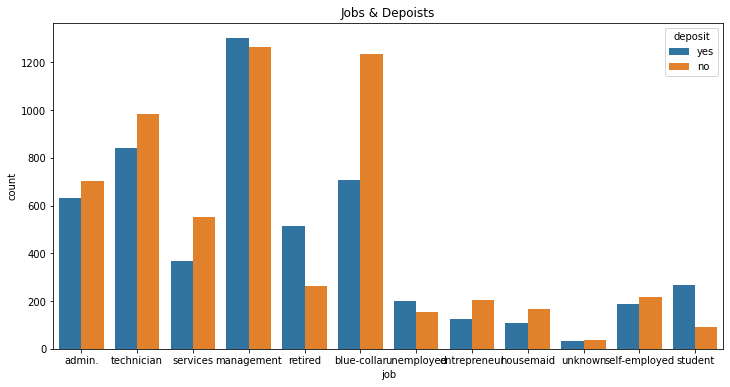

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x="job", hue="deposit", data=df)
plt.title('Jobs & Depoists')

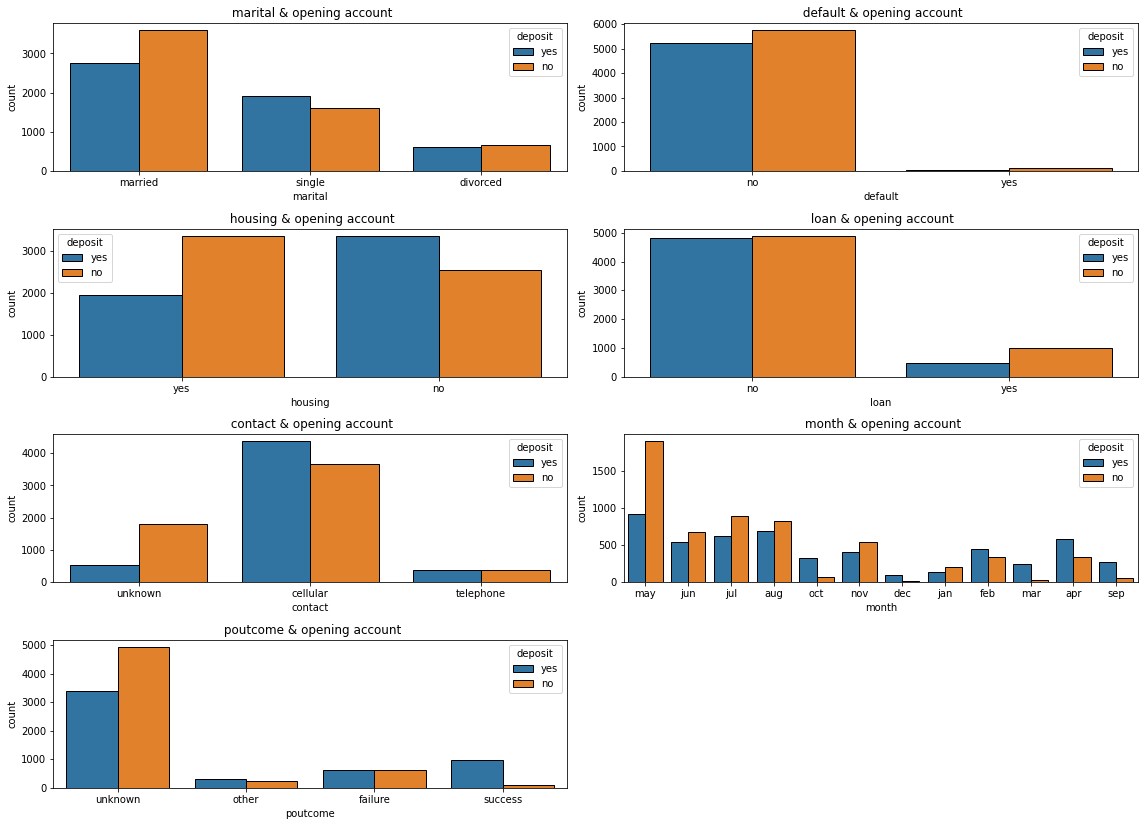

In [24]:
col_cat=['marital','default','housing','loan','contact','month','poutcome']
df[col_cat]
plt.figure(figsize=(16,14))
for i,features in enumerate(df[col_cat]):
    plt.subplot(5,2,i+1)
    sns.countplot(x=features,hue='deposit',data=df,edgecolor="black")
    plt.title(" {} & opening account".format(features))
plt.tight_layout() 
plt.show()

Obtained information:

Single people are more likely to open an account.
People who do not have a housing loan are more likely to open an account.
Customers who contacted us via mobile phone are more likely to open an account.
Students and retirees are more likely to open an account.
The account opening rate decreases in May

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous
7 deposit


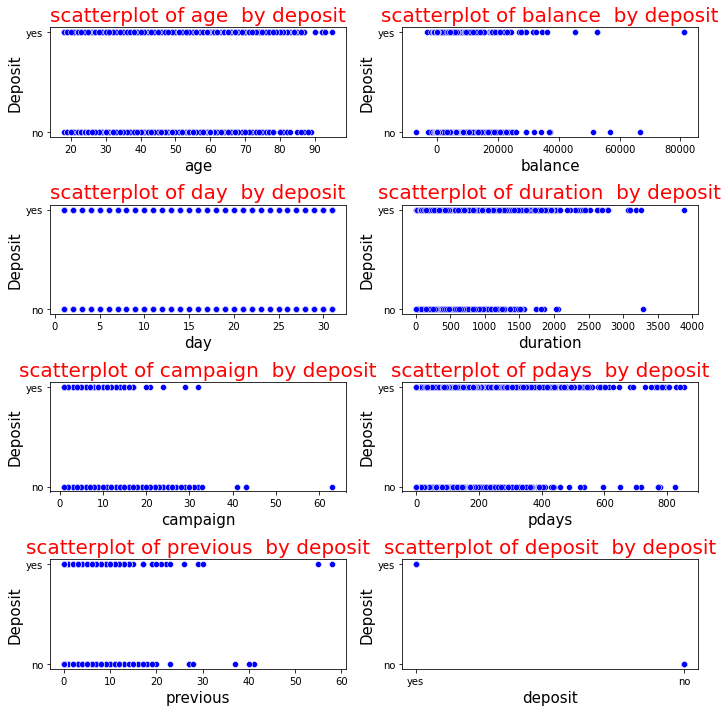

In [25]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']]
col_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']
plt.figure(figsize=(10,10))
for i,v in enumerate(col_num):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=v,y='deposit' ,data=df_num,color='blue')
    plt.title("scatterplot of {}  by deposit".format(v),size=20,color="red")
    plt.xlabel("{}".format(v),size=15)
    plt.ylabel("Deposit",size=15)
plt.tight_layout()
plt.show()

he information obtained:

The longer the duration of the call, the more likely people are to open an account.
The fewer contacts during the campaign period with the bank's representatives (campaign), the more likely people are to open an account.

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


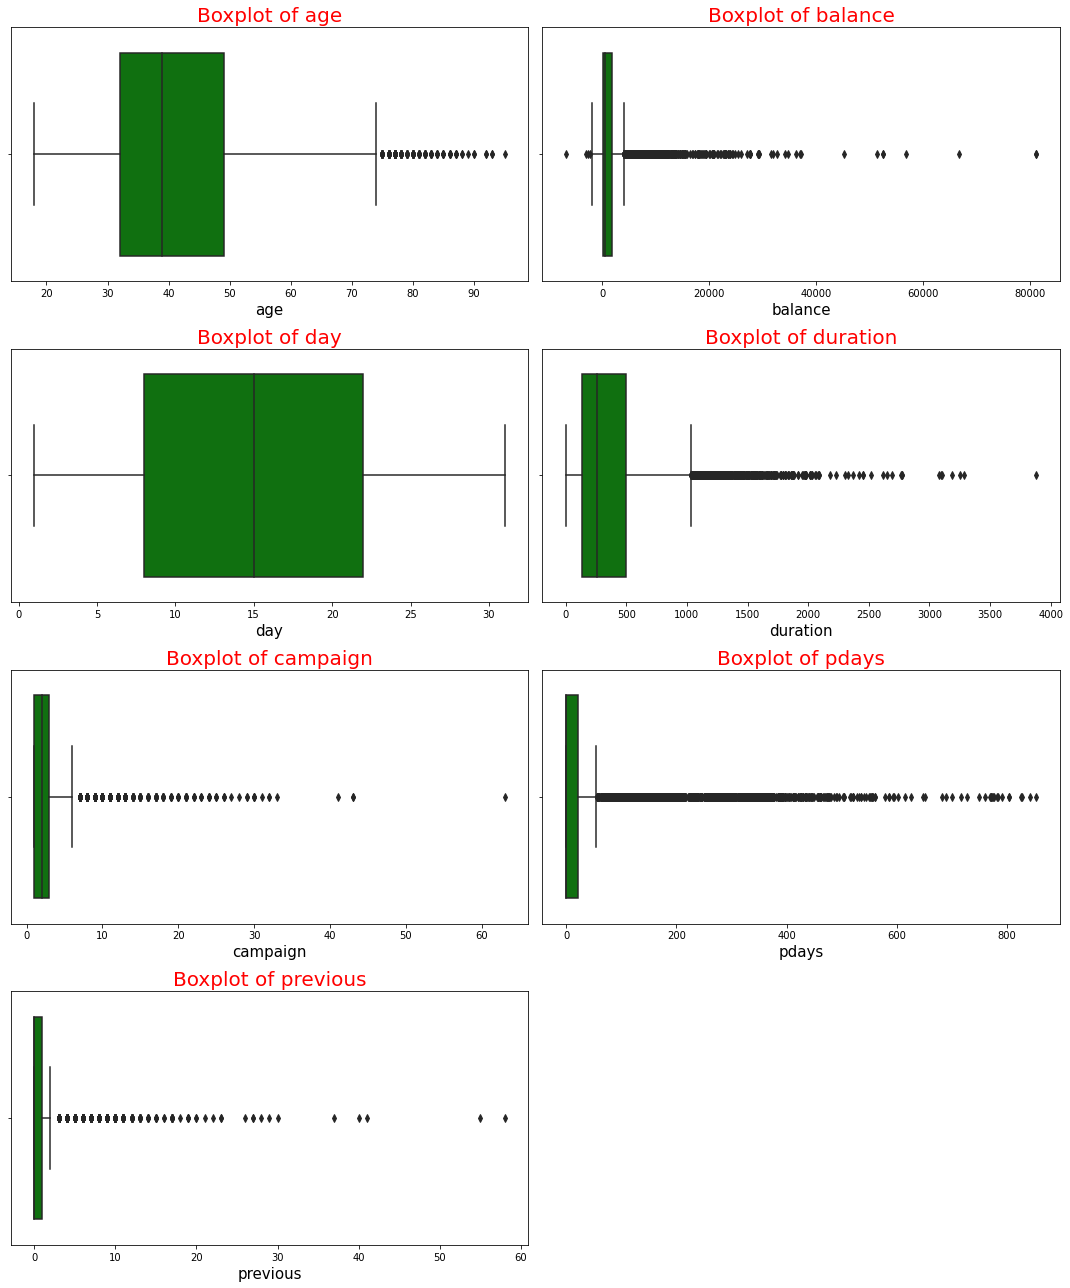

In [26]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v,data=df_num,color='green')
    plt.title("Boxplot of {}".format(v),size=20,color="red")
    plt.xlabel("{}".format(v),size=15)
plt.tight_layout()
plt.show()

outlier

In [27]:
len(df[df['pdays']==-1])/df.shape[0]


0.745744490234725

In [28]:
df[df['duration']>3000]['deposit'].value_counts()
#/df.shape[0]

yes    6
no     1
Name: deposit, dtype: int64

In [29]:
df[df['balance']>40000]['deposit'].value_counts()


yes    5
no     3
Name: deposit, dtype: int64

In [30]:
df[df['campaign']>30]['deposit'].value_counts()


no     7
yes    1
Name: deposit, dtype: int64

In [31]:
df.drop(df[df['balance']>40000].index,inplace=True,axis=0)

df.drop(df[df['duration']>3000].index,inplace=True,axis=0)
df.drop(df[df['campaign']>30].index,axis=0,inplace=True)
df.drop("pdays",inplace=True,axis=1)
df.drop(df[df['previous']>30].index,axis=0,inplace=True)

dataset

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,failure,no


<AxesSubplot:>

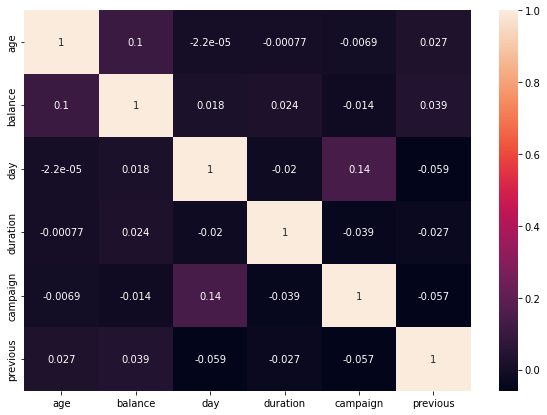

In [33]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'previous']]
plt.figure(figsize=(10,7))
sns.heatmap(data=df_num.corr(), annot=True)

encoding

In [34]:
dic = {"yes":1,"no":0}
lst = ["deposit","loan","default","housing"]
for i in lst:
    df[i] = df[i].map(dic)

In [35]:
df = pd.get_dummies(df, columns = ['job','marital','education','contact', 'month', 'poutcome'])


In [36]:
df

,age,default,balance,housing,loan,day,duration,campaign,previous,deposit,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,0,1,...,0,0,1,0,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,0,0,16,83,4,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,32,0,29,0,0,19,156,2,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,0,0,1,8,9,2,5,0,...,0,0,1,0,0,0,1,0,0,0


In [37]:
df['deposit'].value_counts()


0    5859
1    5275
Name: deposit, dtype: int64

In [38]:
df=df.reset_index() 
df.drop('index',axis=1,inplace=True)
df

,age,default,balance,housing,loan,day,duration,campaign,previous,deposit,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,0,1,...,0,0,1,0,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11129,33,0,1,1,0,20,257,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11130,39,0,733,0,0,16,83,4,0,0,...,1,0,0,0,0,0,0,0,0,1
11131,32,0,29,0,0,19,156,2,0,0,...,0,0,0,0,0,0,0,0,0,1
11132,43,0,0,0,1,8,9,2,5,0,...,0,0,1,0,0,0,1,0,0,0


In [39]:
df.columns


Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

training and testing

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('deposit',axis=1)
y = df['deposit']
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3, random_state=42)
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(7793, 47)
(3341, 47)
(7793,)
(3341,)



 AdaBoostClassifier 

 
"AdaBoost (short for Adaptive Boosting) is an ensemble learning algorithm based on multiple base classifiers. In addition to randomly generating base classifiers, it also increases the sampling weight of observation values that were misclassified in the previous base classifier, so that these observation values have a higher probability of being selected in the formation of the next base classifier. This improves the probability of correct classification and is an advanced Bagging algorithm that adjusts the sampling weight of observation values in real-time."

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)
print('train', ada_clf.score(X_train, y_train))
print('test', ada_clf.score(X_test, y_test))

train 0.8280508148338253
test 0.8255013469021251


In [42]:
ada_clf.get_params().keys()


dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [51]:
feature_importance=ada_clf.feature_importances_.round(3)
pd.DataFrame(feature_importance, index=X.columns, columns=['coefficient']).\
sort_values(by='coefficient', ascending=False).head(5)
#feature_importnces 

,coefficient
duration,0.36
balance,0.06
day,0.06
age,0.04
campaign,0.04


In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_pl = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
model_pl.fit(X_train, y_train)
print(model.score(X_train,y_train).round(3))
print(model.score(X_test, y_test).round(3))

0.827
0.831


SVC

In [53]:
from sklearn.svm import SVC

model_pl_svc = make_pipeline(StandardScaler(), SVC())
model_pl_svc.fit(X_train,y_train)
print(model.score(X_train,y_train).round(3))
print(model.score(X_test,y_test).round(3))

0.827
0.831


Conclusion

1-Contact time is important (try to extend the conversation time as much as possible to increase the success rate).
2-Customers with higher account balances are more likely to open an account.
3-Choosing the right date is also important.
4- Age is also related to the success rate of account opening (older age is easier to succeed).
5-The number of times we have contacted customers during this event is also related (the more times we contact, the higher the success rate).

The next marketing campaign should target wealthy seniors and accompany them in conversations to increase interaction and extend contact time. By doing so, we can expect that the success rate of account opening in the next marketing campaign will increase.









